In [ ]:
#지하철 월별 유동인구 데이터 통합

# 20년 2월 테스트 코딩
def test():
    file_path2002 = './data/semiproject_data/seoul subway days/CARD_SUBWAY_MONTH_202002.csv'
    subData = pd.read_csv(file_path2002 , sep =',' , encoding='CP949' , index_col=False)
    subway_col = [i for i in subData.columns]

    print(subData.head())
    print('------------------------------------------------------------------------------------')
    print("행과 열의 개수는 " , subData.shape)
    print('------------------------------------------------------------------------------------')
    print(subData.columns) # 어떤 컬럼들이 있는지
    print('------------------------------------------------------------------------------------')
    print(subData.dtypes)  # 각 컬럼들의 데이터 타입을 알려준다.
    print('------------------------------------------------------------------------------------')
    print(subData.groupby(['사용일자'])["하차총승객수"].sum()) # 사용일자 그룹바이
    print('------------------------------------------------------------------------------------')
    subData["승하차총승객수"] = subData["승차총승객수"] + subData["하차총승객수"] # 사용일자 별로 묶어서 승하차총승객수만 나오는 테이블 저장
    print(subData.head())
    print('------------------------------------------------------------------------------------')


    subData_sum = subData.groupby(['사용일자'], as_index=False)["승하차총승객수"].sum()
    print( "pdata_sum groupby 사용일자 승하차총승객수" )
    print( subData_sum.head() )
    print( subData_sum.dtypes )
    print('------------------------------------------------------------------------------------')


    subData_sum["사용일자"] = pd.to_datetime(subData_sum["사용일자"], format='%Y%m%d')
    print(subData_sum)
    print(subData_sum.dtypes)
    plt.plot(subData_sum['사용일자'], subData_sum['승하차총승객수'])
    plt.show()



# test()




# 20년 2월 ~ 21년 7월까지 지하철 승하차 데이터 통합 , 서울안에 있는 역들만 추출
from glob import glob  # 파일 경로를 조작할 수 있다.
import chardet # 엑셀파인의 인코딩 방식을 리턴

def subway_all_file():
    # 해당 디렉토리 내에 .csv 파일을 다 불러와서 리스트에 담아준다.
    file_path = glob("C:\\Users\\wlduq\\PycharmProjects\\python_base\\data\\semiproject_data\\seoul subway days\\*.csv")
    all_file = []
    # 인코딩 확인 코드-----------------------------------------------
    for path in file_path:
        rawdata = open(path, 'rb').read()  # 파일 열고
        result = chardet.detect(rawdata)  # 인코딩 형식 검사하고
        charenc = result['encoding']  # 인코딩 결과 확인하고
        print(charenc)
        # 인코딩 확인 코드 마무리 ----------------------------------------
        # utf8 error -> engine='python' 으로 해결 (무시하는듯 한글깨짐)
        # 위에서 확인한 인코딩을 넣어서 append
        all_file.append(pd.read_csv(path, encoding=charenc, index_col=False))
    # print(len(all_file))
    for i in all_file:
               print(result['encoding'])
               print(i.dtypes)
    print(i)
    print('-----------------------------------------------------------')
    # 위에서 모든 엑셀 파일을 열어서 내용을 담은 all_file을 같은 컬럼이니 합친다.
    all_data = pd.concat(all_file, ignore_index=True)
    print(all_data)
    # print(all_data.dtypes)
    all_data["승하차총승객수"] = all_data["승차총승객수"] + all_data["하차총승객수"]  # 사용일자 별로 묶어서 승하차총승객수만 나오는 테이블 저장
    print(all_data.head())
    print('------------------------------------------------------------------------------------')
    # 서울에있는 역만 추출
    seoul_station = ["가락시장", "가산디지털단지", "가양", "가오리", "가좌", "강남", "강남구청", "강동", "강동구청", "강변", "강일", "개롱", "개봉",
                     "개포동","개화", "개화산", "거여", "건대입구", "경복궁", "경찰병원", "고덕", "고려대", "고속터미널", "공덕", "공릉", "공항시장", "광나루","광운대",
                     "광화문", "광흥창", "교대", "구로", "구로디지털단지", "구룡", "구반포", "구산", "구의", "구일", "구파발", "국회의사당", "군자","굽은다리",
                     "금천구청", "금호", "길동", "길음", "김포공항", "까치산", "낙성대", "남구로", "남부터미널", "남성", "남영", "남태령", "내방", "노들",
                     "노량진", "노원", "녹번", "녹사평", "녹천", "논현", "답십리", "당고개", "당산", "대림", "대모산입구", "대방", "대청", "대치",
                     "대흥","도곡", "도림천", "도봉", "도봉산", "독립문", "독바위", "독산", "돌곶이", "동대문", "동대문역사문화공원", "동대입구", "동묘앞", "동작",
                     "둔촌동", "둔촌오륜", "등촌", "디지털미디어시티", "뚝섬", "뚝섬유원지", "마곡", "마곡나루", "마들", "마장", "마천", "마포", "마포구청",
                     "망우","망원", "매봉", "먹골", "면목", "명동", "명일", "목동", "몽촌토성", "무악재", "문래", "문정", "미아", "미아사거리", "반포", "발산",
                     "방배", "방이", "방학", "방화", "버티고개", "보라매", "보문", "복정", "봉은사", "봉천", "봉화산", "북한산보국문", "북한산우이", "불광",
                     "사가정", "사당", "사평", "삼각지", "삼성", "삼성중앙", "삼양", "삼양사거리", "삼전", "상계", "상도", "상봉", "상수", "상왕십리",
                     "상월곡", "상일동", "새절", "샛강", "서강대", "서대문", "서빙고", "서울대입구", "서울숲", "서울역", "서초", "석계", "석촌", "석촌고분", "선릉",
                     "선유도", "선정릉", "성수", "성신여대입구", "솔샘", "솔밭공원", "송정", "송파", "송파나루", "수락산", "수색", "수서", "수유",
                     "숙대입구", "숭실대입구", "시청", "신금호", "신길", "신내", "신논현", "신답", "신당", "신대방", "신대방삼거리", "신도림", "신림", "신목동",
                     "신반포", "신방화", "신사", "신설동", "신용산", "신이문", "신정", "신정네거리", "신촌(2)", "신촌(경)", "신풍", "쌍문", "아차산", "아현",
                     "안국", "안암", "암사", "압구정", "압구정로데오", "애오개", "약수", "양원", "양재", "양재시민의숲", "양천구청", "양천향교", "양평(5)",
                     "어린이대공원", "언주", "여의나루", "여의도", "역삼", "역촌", "연신내", "염창", "영등포", "영등포구청", "영등포시장", "오금", "오류동", "오목교",
                     "옥수", "온수", "올림픽공원", "왕십리", "외대앞", "용답", "용두", "용마산", "용산", "우장산", "월계", "월곡", "월드컵경기장", "을지로입구",
                     "을지로3가", "을지로4가", "응봉", "응암", "이대", "이수", "이촌", "이태원", "일원", "잠실", "잠실나루", "잠실새내", "잠원",
                     "장승배기", "장지", "장한평", "정릉", "제기동", "종각", "종로3가", "종로5가", "종합운동장", "중계", "중곡", "중랑", "중앙보훈병원", "중화",
                     "증미", "증산", "창동", "창신", "천왕", "천호", "청구", "청담", "청량리", "충무로", "충정로", "태릉입구", "하계", "학동", "학여울",
                     "한강진", "한남", "한성대입구", "한성백제", "한양대", "한티", "합정", "행당", "혜화", "홍대입구", "홍제", "화계", "화곡", "화랑대", "회기",
                     "회현", "효창공원앞", "흑석"]

    # 엑셀의 전체 역들 중복제거
    station = all_data["역명"].unique()
    print(len(station), len(seoul_station))
    cnt = 0
    same_st = []
    for j in seoul_station:  # 여기서 단어를 비교
        for i in station:  # () 가 추가로 붙어있음
            # print(j.find(i))
            if i.find(j) == 0 and i not in same_st:
                if i == j:
                    same_st.append(i)
                elif i.find(j + "(") == 0:
                    same_st.append(i)
                else:
                    pass
            elif i == "신촌" and j == "신촌(2)":
                same_st.append(j)
            elif i == "신촌" and j == "신촌(경)":
                same_st.append(j)
            elif i == "양평" and j == "양평(5)":
                same_st.append(j)
    # print(len(same_st))
    # for i in same_st:
    #     print(i)

    global seoul_data
    seoul_data = all_data[all_data["역명"].isin(same_st)]

    print(seoul_data)
    print(type(seoul_data))
    # 엑셀파일 저장 
    #seoul_data.to_csv("test.csv")
subway_all_file()

   Unnamed: 0       사용일자  노선명    역명   승차총승객수   하차총승객수      등록일자  승하차총승객수
0           0 2020-02-01  1호선    시청  13966.0  14315.0  20200204  28281.0
1           1 2020-02-01  1호선    종각  24014.0  23628.0  20200204  47642.0
2           2 2020-02-01  1호선  종로3가  25613.0  24969.0  20200204  50582.0
3           3 2020-02-01  1호선  종로5가  19922.0  19765.0  20200204  39687.0
4           4 2020-02-01  1호선   동대문  11346.0  11210.0  20200204  22556.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201294 entries, 0 to 201293
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  201294 non-null  int64         
 1   사용일자        201294 non-null  datetime64[ns]
 2   노선명         201294 non-null  object        
 3   역명          201294 non-null  object        
 4   승차총승객수      201294 non-null  float64       
 5   하차총승객수      201294 non-null  float64       
 6   등록일자        201294 non-null  int64         
 7   승하차총승객

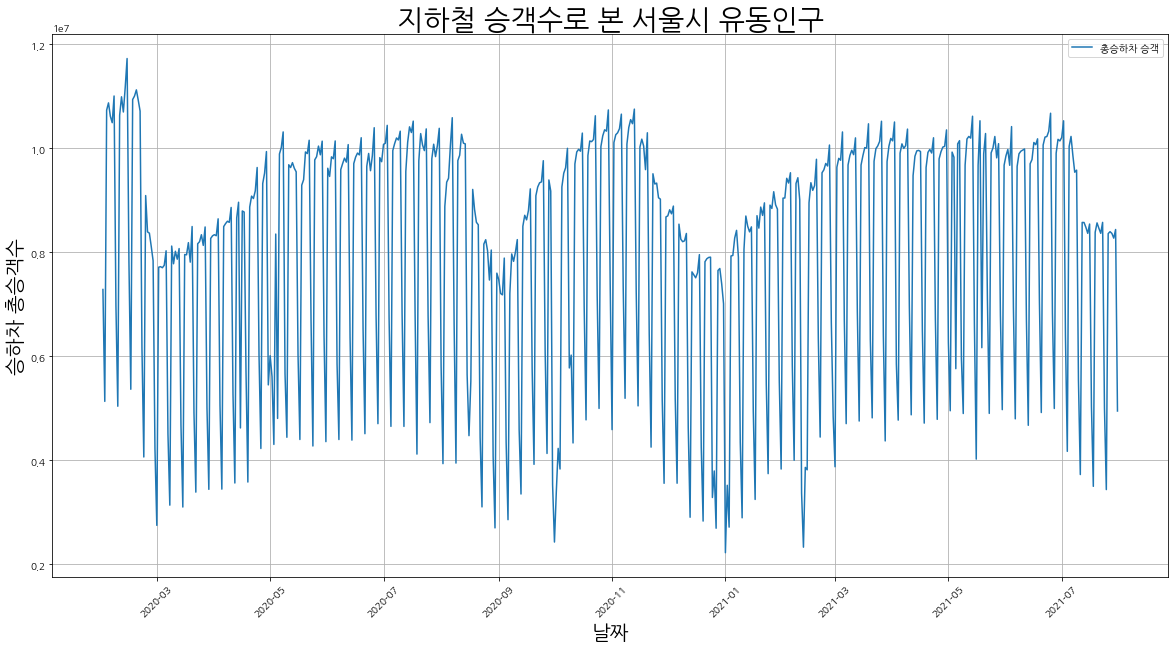

KeyError: '기준일ID'

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
def seoulSubway():
    # CSV 파일 불러오기
    file_path = "C:/Users/wlduq/PycharmProjects/python_base/data/semiproject_data/station_utf8.csv"
    global seoulSub
    seoulSub = pd.read_csv(file_path, encoding='CP949', index_col=False)
    seoulSub["사용일자"] = pd.to_datetime(seoulSub["사용일자"], format='%Y%m%d')
    print(seoulSub.head())
    print(seoulSub.info())
    seoulSubSum = seoulSub.groupby(['사용일자'],as_index = False )['승하차총승객수'].sum()
    
    
    plt.figure(figsize = (20,10))
    plt.plot(seoulSubSum['사용일자'], seoulSubSum['승하차총승객수'], label = "총승하차 승객")
    plt.title("지하철 승객수로 본 서울시 유동인구" , fontsize = 28)
    plt.xlabel("날짜", fontsize = 20)
    plt.xticks(rotation=45)
    plt.ylabel("승하차 총승객수" , fontsize = 20)
    
    plt.grid()
    plt.legend(loc=1)
    plt.show()
    
    
    
    
seoulSubway()

In [3]:
import pandas as pd

def cumulative_corona():    

    # csv 파일 불러오기 ----------------------------------------------
    file_path = 'C:/Users/wlduq/PycharmProjects/python_base/data/semiproject_data/서울특별시 코로나19 자치구별 확진자 발생동향.csv'
    df = pd.read_csv(file_path, encoding='CP949', index_col=False)

    # 결측값 제거 -----------------------------------------------------
    na_index = df[df['자치구 기준일'] == '20'].index  # 자치구 기준일이 20인 데이터의 인덱스를 추출
    # print(na_index)
    covData = df.drop(na_index)
    # print(covData.info())

    # '자치구 기준일' data 타입으로 변환 ------------------------------
#     covData['자치구 기준일'] = pd.to_datetime(covData['자치구 기준일'])
    covData["자치구 기준일"] = covData["자치구 기준일"].str.slice(start=0 , stop=10)
    covData["자치구 기준일"] = pd.to_datetime(covData["자치구 기준일"] , format = '%Y.%m.%d')
    # 오래된 날짜 순서로 정렬 -----------------------------------------
    covData = covData.sort_values(by=['자치구 기준일'])
    print("**************************************************************")
    print(covData)

    # 자치구별 누적확진자수만 추출해 데이터프레임생성 -----------------
    global cumulative
    cumulative = covData.filter(regex='기준일|전체')
    # print(cumulative.head())

    pd.set_option('mode.chained_assignment', None)  # ↓자꾸 에러떠서 경고문 끔
    # 서울시 전체 누적확진자수 컬럼 추가
    print(cumulative.info())

    cumulative['총누적확진자수'] = cumulative.iloc[:, 1:26].sum(axis=1)
#     print(cumulative.tail())

    # 자치구별 신규확진자수 추출해 데이터프레임생성 -------------------
    new = covData.filter(regex='기준일|추가')
    new['총신규확진자수'] = new.iloc[:, 1:26].sum(axis=1)
#     print(new.head())

    # 시각화 -----------------------------------------------------------
    import matplotlib.pyplot as plt
    from matplotlib import rcParams
    rcParams['axes.unicode_minus'] = False
    plt.rc('font', family='NanumGothic')

    # 1. 서울 전체 누적확진자수 그래프 ---------------------------------
    # 인덱스 설정
    # 기준일 컬럼을 인덱스로 지정


cumulative_corona()
print(cumulative)

**************************************************************
       자치구 기준일  종로구 전체  종로구 추가  중구 전체  중구 추가  용산구 전체  용산구 추가  성동구 전체  성동구 추가  \
516 2020-02-28    11.0     0.0    0.0    0.0     0.0     0.0     2.0     0.0   
515 2020-02-29    11.0     0.0    0.0    0.0     0.0     0.0     3.0     1.0   
514 2020-03-01    11.0     0.0    0.0    0.0     0.0     0.0     3.0     0.0   
513 2020-03-02    11.0     0.0    0.0    0.0     0.0     0.0     3.0     0.0   
512 2020-03-03    11.0     0.0    0.0    0.0     0.0     0.0     3.0     0.0   
..         ...     ...     ...    ...    ...     ...     ...     ...     ...   
4   2021-07-23   976.0     7.0  885.0   11.0  1785.0    19.0  1825.0    17.0   
3   2021-07-24   981.0     4.0  892.0    9.0  1800.0    15.0  1841.0    16.0   
2   2021-07-25   991.0    10.0  899.0    7.0  1812.0    12.0  1847.0     6.0   
1   2021-07-26   995.0     4.0  906.0    7.0  1819.0     7.0  1861.0    14.0   
0   2021-07-27   997.0     2.0  908.0    5.0  1832.0    1

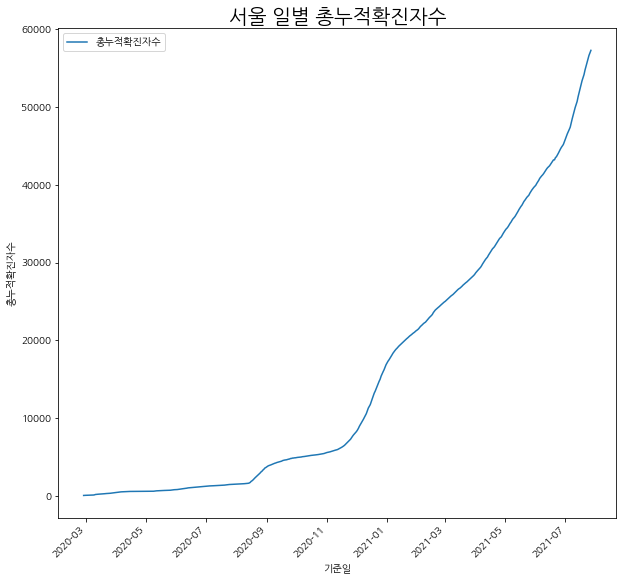

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumGothic')

# 서울 전체 누적확진자수 그래프
# 그래프 생성
cumulative.set_index('자치구 기준일', inplace=True)
cumulative.plot(y='총누적확진자수', figsize=(10, 10))
plt.ylabel('총누적확진자수', fontsize=10)
plt.xlabel('기준일', fontsize=10)
plt.xticks(rotation=45)  ## x축 눈금 라벨 설정 - 40도 회전
plt.title('서울 일별 총누적확진자수', fontsize=20)  ## 타이틀 설정
plt.show()



Index(['사용일자', '종로구 전체', '중구 전체', '용산구 전체', '성동구 전체', '광진구 전체', '동대문구 전체',
       '중랑구 전체', '성북구 전체', '강북구 전체', '도봉구 전체', '노원구 전체', '은평구 전체', '서대문구 전체',
       '마포구 전체', '양천구 전체', '강서구 전체', '구로구 전체', '금천구 전체', '영등포구 전체', '동작구 전체',
       '관악구 전체', '서초구 전체', '강남구 전체', '송파구 전체', '강동구 전체', '기타 전체', '총누적확진자수'],
      dtype='object')
------------------------------------------------------------------------
Index(['Unnamed: 0', '사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자',
       '승하차총승객수'],
      dtype='object')
------------------------------------------------------------------------
        Unnamed: 0       사용일자  노선명         역명   승차총승객수   하차총승객수      등록일자  \
0            15938 2020-02-28  6호선         합정  10710.0  10698.0  20200302   
1            15939 2020-02-28  1호선        서울역  32454.0  30638.0  20200302   
2            15940 2020-02-28  1호선         시청  18813.0  19104.0  20200302   
3            15941 2020-02-28  1호선         종각  30695.0  29840.0  20200302   
4            15942 2020-02-

ConversionError: Failed to convert value(s) to axis units: array(['6호선', '1호선', '1호선', ..., '경의선', '6호선', '9호선'], dtype=object)

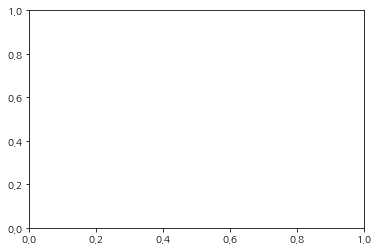

In [153]:
import pandas as pd

# print(type(cumulative)) 
print(cumulative.columns) # 자치구 코로나 
print("------------------------------------------------------------------------") 
# print(type(seoulSub)) 
print(seoulSub.columns) #서울에 있는 역 , 총승하자승객
print("------------------------------------------------------------------------")

cumulative.rename(columns={'자치구 기준일':'사용일자'} , inplace = True)

# cumulative.rename(columns={'자치구 기준일':'사용일자'}, inplace = True)
# coronic_new.rename(columns={'자치구 기준일':'사용일자'}, inplace = True)


covidSub = pd.merge(seoulSub, cumulative, how='inner', on='사용일자')
print(covidSub)

# plt.plot(covidSub)
# plt.show

# print(covidSub)

# print(cumulative)
# print(seoulSub)

